# Titanic Survivor Prediction (with additional predictions on movie characters)
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.
<br>
One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.
![](https://media1.popsugar-assets.com/files/thumbor/EPf-QLPGGdbYGlKExZ3gIKLc1IU/fit-in/1024x1024/filters:format_auto-!!-:strip_icc-!!-/2014/10/03/806/n/1922283/5d8c153f0f488cb0_anigif_enhanced-buzz-18158-1381217382-36/i/When-He-Tries-Keep-Things-Light-While-Freezing-Death.gif)
<br>
In this challenge, we are asked to complete the analysis of what sorts of people were likely to survive. In particular, we are asked to apply machine learning to predict which passengers survived the tragedy.

# Part 1: Load packages and first glimpse of dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['titanic', 'movie-test', 'titanic-movie-characters', 'movie-test-with-dummies', 'movie-characters']


In [2]:
# Load the dataset

train_data = pd.read_csv("../input/titanic/train.csv")
test_data = pd.read_csv("../input/titanic/test.csv")
test_data_PassengerId = pd.read_csv("../input/titanic/test.csv")
movie_data = pd.read_csv("../input/movie-test-with-dummies/movie_test.csv")

### First inspection of training set
Looking at the first and last 10 rows below gives us a flavour of the dataset.
We will try to predict the categorical variable in the "Survived" column using the data from other columns.

In [3]:
# Look at the first few rows to get an idea of what data we are working with
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train_data.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


### Basic Stats
Get some basic statistical info on those features that are numerical. The categorical features will be dealt with later.

In [5]:
# Let's get some basic statistical properties for the training set (for numerical columns)
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Some observations:
* There is data on 891 passengers to train on. About 40% of the total passenger list (2,224 people)
* Of the 891 passengers to train on around 38% survived. A little higher than overall survival rate (32%)
* The mean age was 29 years. The upper quartile was 38 and the maximum was 80 meaning very few passengers were very old.
* SibSp gives a score of 1 for every sibling or spouse present on board
* Parch gives a score of 1 for every parent or child on board (note some children travelled with nannies and thus score 0)
* The mean fare was \$32. The upper quartile was \$31 and the max was \$512 meaning very few passengers paid these very high fares.

# Part 2: Investigate effect of individual features on survival rates

## Feature 1: Age Analysis
There are 177 passengers for which the age is unkown. This appears as "Nan" in the original dataset. Since dropping all of these ($\sim 20\%$ of entire training set) is unacceptable we will need to come up with a clever means of filling them:
*  We replacr these unkown ages by randomly generated ages in the range $[\mu_{\text{age}} - 0.5\sigma_{\text{age}}, \mu_{\text{age}} + 0.5\sigma_{\text{age}}]$. Note that half a standard deviation either side of the mean provided an improvement in accuracy over a full standard deviation. 
*  We show a histogram of passenger numbers by age before and after the journey (for both original and preprocessed data)
<br>
<br>
Then for preprocessed data only:
* We show a distribution of survival rates by age
* We show a second histogram of survival numbers by age but now with a heat map

In [6]:
print("Number of passengers with unknown age: {}".format(train_data["Age"].isnull().sum()))

Number of passengers with unknown age: 177


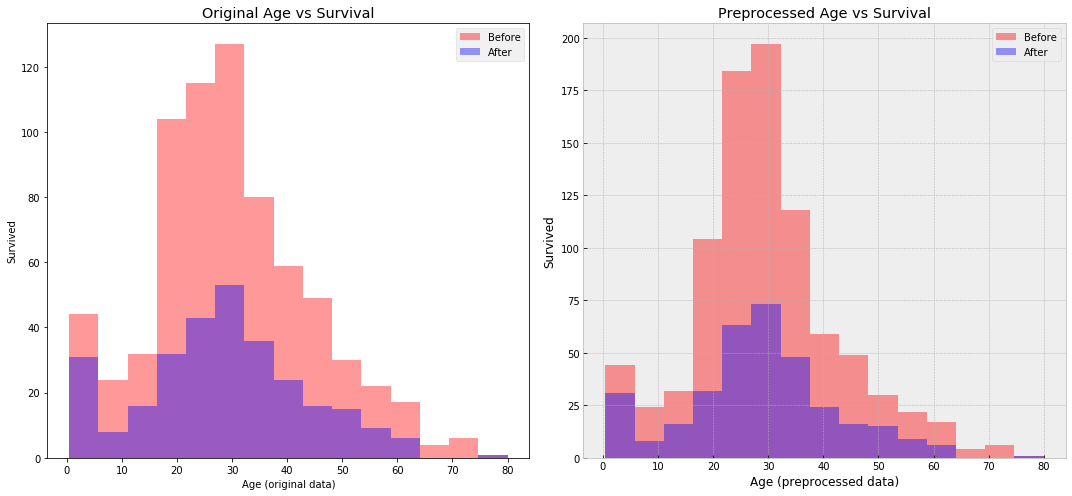

In [7]:
# Deal with age first. Idea is to find mean and std and fill Nan values with random numbers in range [mean-std, mean+std]

# Get mean and std of age as well as number of Nan values for train set
train_age_mean = train_data["Age"].mean()
train_age_std = train_data["Age"].std()
train_age_nan = train_data["Age"].isnull().sum()

# Get mean and std of age as well as number of Nan values for train set
test_age_mean = test_data["Age"].mean()
test_age_std = test_data["Age"].std()
test_age_nan = test_data["Age"].isnull().sum()

# Generate enough random numbers in range [mean-0.5*std, mean+0.5*std] for train set
train_age_rand = np.random.randint(train_age_mean - 0.5*train_age_std, train_age_mean + 0.5*train_age_std, size = train_age_nan)

# Generate enough random numbers in range [mean-0.5*std, mean+0.5*std] for test set
test_age_rand = np.random.randint(test_age_mean - 0.5*test_age_std, test_age_mean + 0.5*test_age_std, size = test_age_nan)

# Create a figure for plotting original and preprocessed age data


# Original age data (simply don't plot Nan values)
plt.figure(figsize=(15,7))
#train_data['Age'].dropna().astype(int).hist(bins=70, ax=axis1)
plt.subplot(1,2,1)
plt.style.use('bmh')
plt.xlabel('Age (original data)')
plt.ylabel('Survived')
plt.title('Original Age vs Survival')
plt.hist(train_data.Age[(np.isnan(train_data.Age) == False)], bins= 15, alpha = 0.4, color = 'r', label = 'Before')
plt.hist(train_data.Age[(np.isnan(train_data.Age) == False) & (train_data.Survived == 1)], bins= 15, alpha = 0.4, color = 'b', label = 'After')
#plt.hist(data.Age[data.Age != np.NaN])
plt.legend(loc = 'upper right')


# Preprocessed age data (first fill the Nan values with the random numbers and then plot them)
train_data.loc[train_data.Age.isnull(), 'Age'] = train_age_rand
test_data.loc[test_data.Age.isnull(), 'Age'] = test_age_rand


#train_data["Age"].hist(bins=70, ax = axis2)
plt.subplot(1,2,2)
plt.style.use('bmh')
plt.xlabel('Age (preprocessed data)')
plt.ylabel('Survived')
plt.title('Preprocessed Age vs Survival')
plt.hist(train_data.Age, bins= 15, alpha = 0.4, color = 'r', label = 'Before')
plt.hist(train_data.Age[(train_data.Survived == 1)], bins= 15, alpha = 0.4, color = 'b', label = 'After')
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()



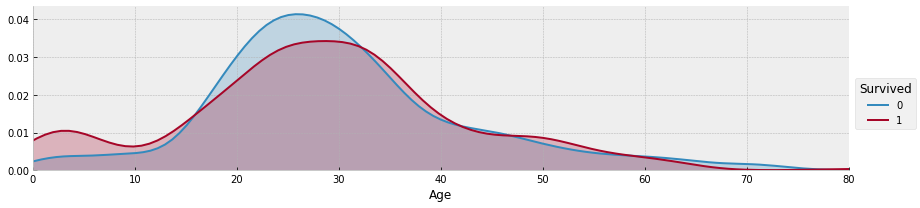

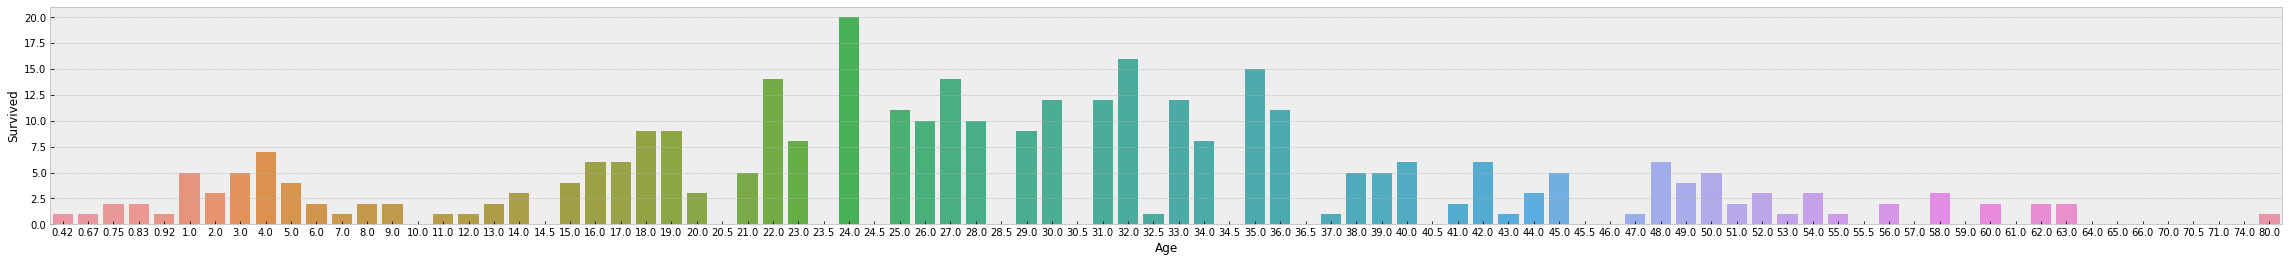

In [8]:
# Using only the preprocessed data, we can further investigate the relationship betweena ge and survival
# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()

# number of survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(40,4))
survival_number_by_age = train_data[["Age", "Survived"]].groupby(['Age'],as_index=False).sum()
sns.barplot(x='Age', y='Survived', data=survival_number_by_age)

It looks like survival rates were highest for those in their twenties and thirties. There is another, smaller, peak for the very young but sever drop off for the old.
<br>
One thing to be aware of is the technique used to fill in the missing data which may be responsible for the large peaks on both survival and death rates around the mean age.

## Dealing with remaining missing data 
We have already dealt with missing ages which affected a significant amount of our dataset (this has been done for both the training and the test set). 
<br>
We will next drop various bits of data from both the training and test sets if they are not going to be useful:
<br>
### Missing Embarked data
There are 2 missing entries in Embarked column. To avoid these entire rows being dropped we'll fill them with S (Southampton) as this is most common entry.
<br>
### The PassengerId and Ticket Number columns can be dropped
This does not offer any information that will be useful for making our prediction
<br>
### The Cabin column can be dropped
Actually this column does offer useful information i.e. which deck of the ship the passenger was on. However, there are 687 passengers for which we don't konw their Cabin location. Therefore I have decided to drop this as well since I couldn't think of a good way to fill missing values.

### Drop remaining Nan values
We can also drop any remaining data entries (rows) that have missing values for any of the features

In [9]:
# Fill missing Embarked data in training set to avoid entire rows being dropped
train_data.loc[train_data.Embarked.isnull(), 'Embarked'] = 'S'

# Drop PassengerId, Name and Ticket Number from training set 
train_data = train_data.drop(["PassengerId", "Cabin", "Ticket"], axis = 1)

# Drop remaining Nan values
train_data = train_data.dropna() 

In [10]:
# There is one passenger in test set with missing Fare data. Below, we identify him.
test_data.loc[test_data.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [11]:
# As this Passenger is travelling in 3rd class, it will be sensible to fill his Fare data with th emean fare paid by other third class passengers. 
test_3class = test_data.loc[test_data['Pclass'] == 1]
mean_fare = test_3class[["Fare"]].mean()
test_data.ix[152, 'Fare'] = mean_fare[0]
test_data.ix[152]

# Drop PassengerId, Name and Ticket Number from test set 
test_data = test_data.drop(["PassengerId", "Cabin", "Ticket"], axis = 1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


To summarise, we have done the following to our training set:
* Replaced missing ages with randomly generated ages (taken from a suitable range) 
* Removed useless features
* Removed remaining missing entries
<br>
<br>
And we have done the following to our test set:
* Replaced missing fare with mean of all fares paid by other passengers travelling in the same class
* Removed useless features
<br>
<br>
Now let's examine the nice clean dataset:

In [12]:
train_data.head(20)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,0,3,"Moran, Mr. James",male,30.0,0,0,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C


## Feature 2: Passenger Class Analysis
We have Passenger Class (PClass) data for all passengers. Therefore we can go straight to plotting the data.
* We show the distribution of passenger classes by age
* We show the survival numbers by class
* We show the survival rates by class (along with a confidence interval)

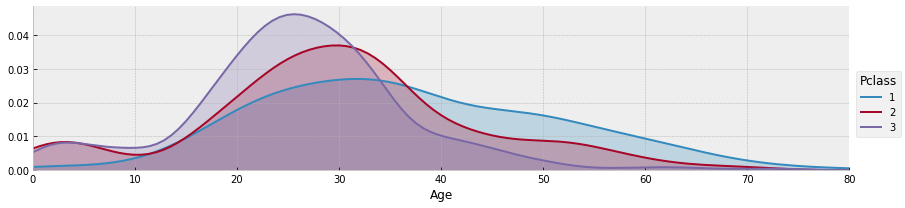

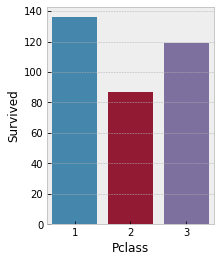

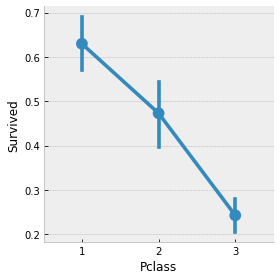

In [13]:
# First compare class to age
fig = sns.FacetGrid(train_data,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade='True')
oldest = train_data['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

# Then a simple bar graph of survived passengers by class
fig, axis1 = plt.subplots(1,1,figsize=(3,4))
survival_number_by_class = train_data[["Pclass", "Survived"]].groupby(['Pclass'],as_index=False).sum()
sns.barplot(x='Pclass', y='Survived', data=survival_number_by_class)

sns.factorplot('Pclass','Survived',data=train_data)

The first graph shows that those in 1st class were generally a little older than those in second and third.
<br>
We see in the second graph that the number of survivors was highest for 1st class, followed by 3rd class and finally 2nd class.
<br>
However, the most interesting graph is the third one, this shows the percentage of passengers that survived from each of the three classes. It is much, much higher for 1st class than 2nd class, which is itself much, much higher than 3rd class. In particular, the survival rate for third class passengers is staggeringly low at $\sim 25\%$.

## Feature 3: Gender Analysis
We have Gender (Sex) data for all passengers. Therefore we can go straight to plotting the data.
* We show the distribution of genders by age
* We show the survival numbers by gender
* We show the survival numers and survival rate by gender

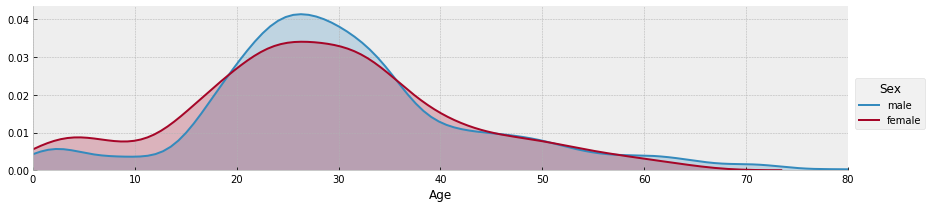

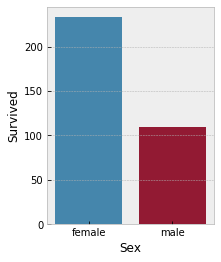

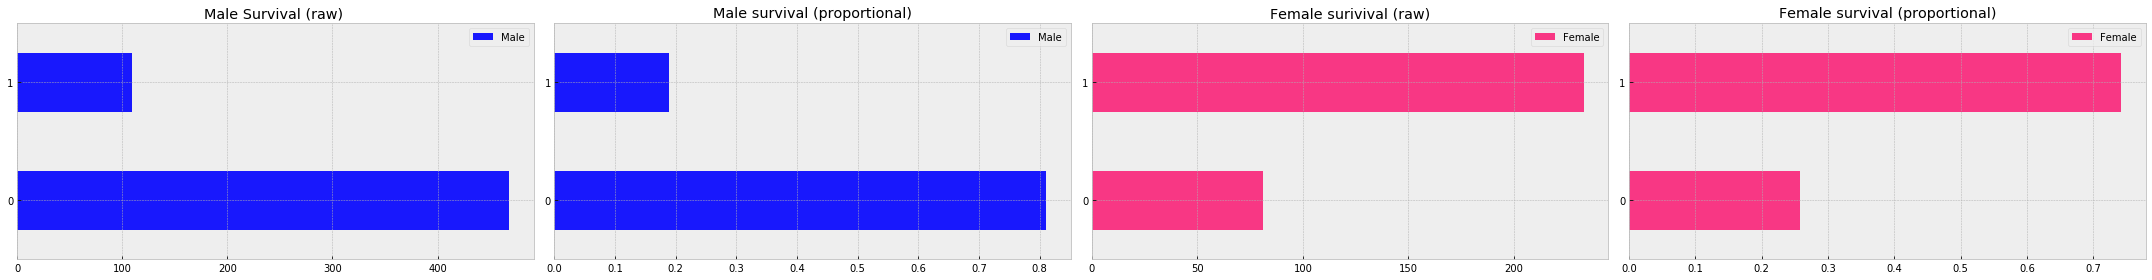

In [14]:
# First compare gender to age
fig = sns.FacetGrid(train_data,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade='True')
oldest = train_data['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

# Then a simple bar graph of survived passengers by class
fig, axis1 = plt.subplots(1,1,figsize=(3,4))
survival_number_by_class = train_data[["Sex", "Survived"]].groupby(['Sex'],as_index=False).sum()
sns.barplot(x='Sex', y='Survived', data=survival_number_by_class)

fig = plt.figure(figsize=(30,4))

#create a plot of two subsets, male and female, of the survived variable.
#After we do that we call value_counts() so it can be easily plotted as a bar graph. 
#'barh' is just a horizontal bar graph
df_male = train_data.Survived[train_data.Sex == 'male'].value_counts().sort_index()
df_female = train_data.Survived[train_data.Sex == 'female'].value_counts().sort_index()


ax1 = fig.add_subplot(141)
df_male.plot(kind='barh',label='Male', color = 'blue', alpha=0.9)
plt.title("Male Survival (raw) "); plt.legend(loc='best')
 

#adjust graph to display the proportions of survival by gender
ax2 = fig.add_subplot(142)
(df_male/float(df_male.sum())).plot(kind='barh',label='Male', color = 'blue', alpha=0.9)  
plt.title("Male survival (proportional)"); plt.legend(loc='best')

ax3 = fig.add_subplot(143)
df_female.plot(kind='barh', color='#FA2379',label='Female', alpha=0.9)
plt.title("Female surivival (raw)"); plt.legend(loc='best')

ax4 = fig.add_subplot(144)
(df_female/float(df_female.sum())).plot(kind='barh',color='#FA2379',label='Female', alpha=0.9)
plt.title("Female survival (proportional)"); plt.legend(loc='best')

plt.tight_layout()

Female survival exceeds male survival both in terms of raw numbers and by the survival percentage. Indeed, $>70\%$ of women survived compared to $<20\%$ of men. The "Women and children first policy" for the lifeboats presumably explains this.


## Feature 4: Family Members Analysis
We now examine how the presence of family members affected survivavl rates. To do this we will use a total family score of FamScore $=$ SibSp $+$ Parch, i.e. number of siblings, spouses, parents and children accompanying them. Note that our predictive models will continue to treat SibSp and Parch separately - combining them is just to help gauge both features at once.

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


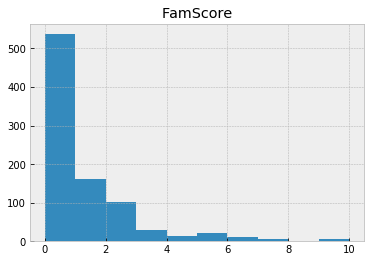

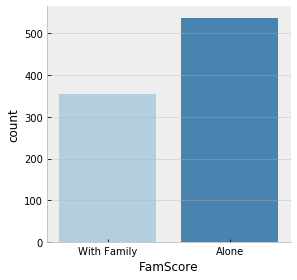

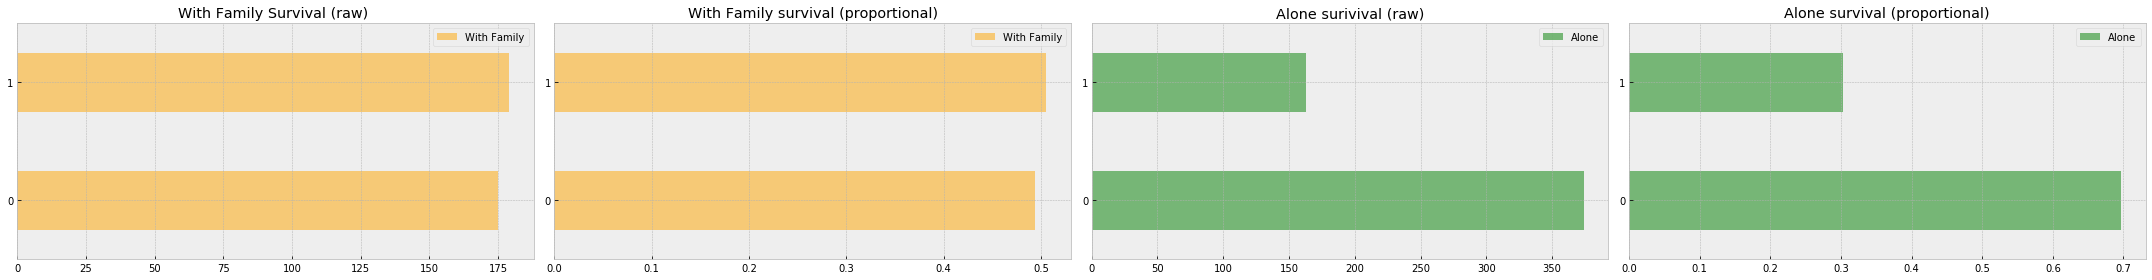

In [15]:
family_data = train_data[['SibSp', 'Parch', 'Survived']].copy()
family_data['FamScore'] = family_data['SibSp'] + family_data['Parch']
family_data.drop(['SibSp','Parch'], axis=1)
columnsTitles=["FamScore","Survived"]
family_data=family_data.reindex(columns=columnsTitles)

# Get distribution of family sizes
family_data.hist('FamScore')

#Transform a nonzero FamScore to "With Family" and a zero FamScore to "Alone"
family_data['FamScore'].loc[family_data['FamScore']>0] = "With Family"
family_data['FamScore'].loc[family_data['FamScore']==0] = "Alone"
sns.factorplot('FamScore',data=family_data,kind='count',palette='Blues')

fig = plt.figure(figsize=(30,4))
#create a plot of two subsets, with family and alone, of the survived variable.
#After we do that we call value_counts() so it can be easily plotted as a bar graph. 
#'barh' is just a horizontal bar graph
df_fam = family_data.Survived[family_data.FamScore == 'With Family'].value_counts().sort_index()
df_alone = family_data.Survived[family_data.FamScore == 'Alone'].value_counts().sort_index()


ax1 = fig.add_subplot(141)
df_fam.plot(kind='barh',label='With Family', color = 'orange', alpha=0.5)
plt.title("With Family Survival (raw) "); plt.legend(loc='best')
 

#adjust graph to display the proportions of survival by gender
ax2 = fig.add_subplot(142)
(df_fam/float(df_fam.sum())).plot(kind='barh',label='With Family', color = 'orange', alpha=0.5)  
plt.title("With Family survival (proportional)"); plt.legend(loc='best')

ax3 = fig.add_subplot(143)
df_alone.plot(kind='barh', color='green',label='Alone', alpha=0.5)
plt.title("Alone surivival (raw)"); plt.legend(loc='best')

ax4 = fig.add_subplot(144)
(df_alone/float(df_alone.sum())).plot(kind='barh',color='green',label='Alone', alpha=0.5)
plt.title("Alone survival (proportional)"); plt.legend(loc='best')

plt.tight_layout()

The above shows that there were $\sim350$ passengers travelling with family. These passengers had a survival rate of above $50\%$.
<br>
Meanwhile, there were in excess of $500$ passengers travelling without family members for whom, rather alarmingly, the survival rate was just $\sim 30\%$. 
<br>
<br>
We can now understand Jack's reaction to Rose reboarding from the lifeboat without first tossing her mother back on board: ![](http://www.blog.urbanoutfitters.com/files/tumblr_mgw445XA221r4gtljo1_500.gif)

## Feature 5: Fare Analysis
We should next examine the impact ticket price had on survival rate

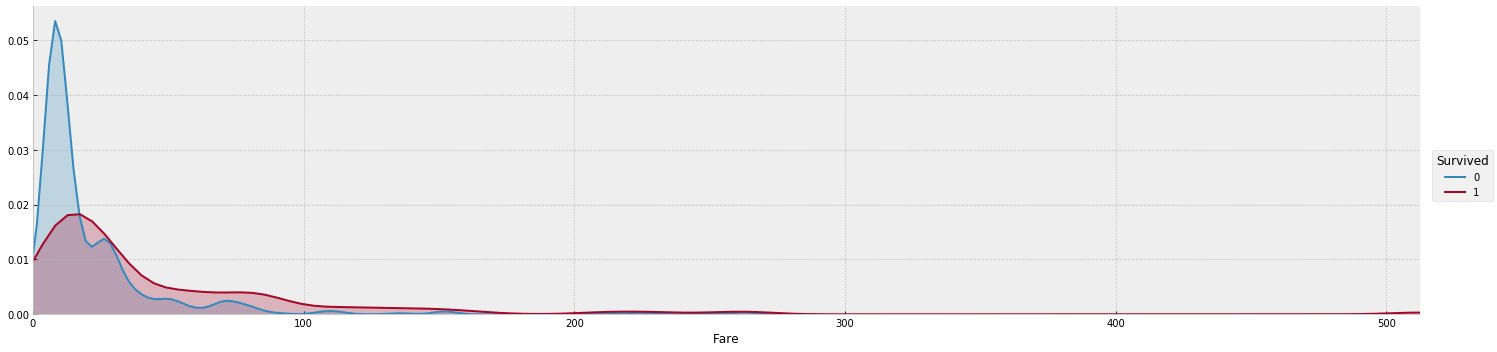

In [16]:
fig = sns.FacetGrid(train_data,hue='Survived',aspect=4,size=5)
fig.map(sns.kdeplot,'Fare',shade='True')
oldest = train_data['Fare'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()


The above survival distribution shows that those with the lowest price tickets were substantially more likely to die in the disaster.

## Feature 6: Embarkation Point
It will be interesting to see whether the embarkation point (C = Cherbourg, Q = Queenstown, S = Southampton) has any impact on survival rate. We plot:
* the number of passengers boarding in each location
* the survival rates for each boarding location

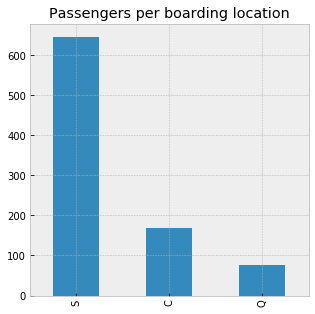

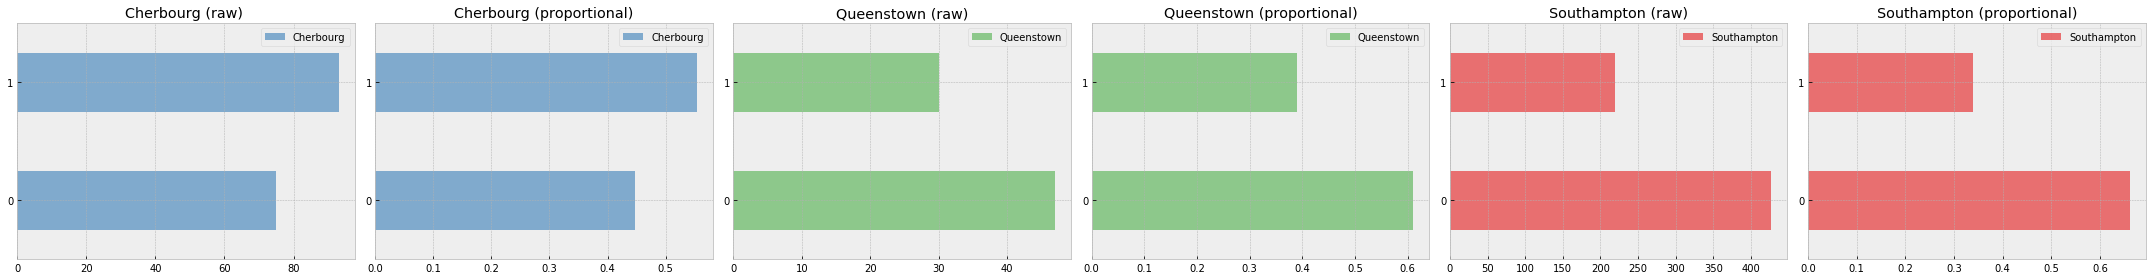

In [17]:
train_data.Embarked.value_counts().plot(kind='bar', figsize=(5,5))
# specifies the parameters of our graphs
plt.title("Passengers per boarding location")

fig = plt.figure(figsize=(30,4))
#create a plot of two subsets, with family and alone, of the survived variable.
#After we do that we call value_counts() so it can be easily plotted as a bar graph. 
#'barh' is just a horizontal bar graph
df_C = train_data.Survived[train_data.Embarked == 'C'].value_counts().sort_index()
df_Q = train_data.Survived[train_data.Embarked == 'Q'].value_counts().sort_index()
df_S = train_data.Survived[train_data.Embarked == 'S'].value_counts().sort_index()

ax1 = fig.add_subplot(161)
df_C.plot(kind='barh',label='Cherbourg', color = '#377eb8', alpha=0.6)
plt.title("Cherbourg (raw) "); plt.legend(loc='best')
 

#adjust graph to display the proportions of survival by gender
ax2 = fig.add_subplot(162)
(df_C/float(df_C.sum())).plot(kind='barh',label='Cherbourg', color = '#377eb8', alpha=0.6)  
plt.title("Cherbourg (proportional)"); plt.legend(loc='best')

ax3 = fig.add_subplot(163)
df_Q.plot(kind='barh', color='#4daf4a',label='Queenstown', alpha=0.6)
plt.title("Queenstown (raw)"); plt.legend(loc='best')

ax4 = fig.add_subplot(164)
(df_Q/float(df_Q.sum())).plot(kind='barh',color='#4daf4a',label='Queenstown', alpha=0.6)
plt.title("Queenstown (proportional)"); plt.legend(loc='best')

ax5 = fig.add_subplot(165)
df_S.plot(kind='barh', color='#e41a1c',label='Southampton', alpha=0.6)
plt.title("Southampton (raw)"); plt.legend(loc='best')

ax6 = fig.add_subplot(166)
(df_S/float(df_S.sum())).plot(kind='barh',color='#e41a1c',label='Southampton', alpha=0.6)
plt.title("Southampton (proportional)"); plt.legend(loc='best')

plt.tight_layout()

Above we can see that the vast majority of passengers boarded in Southampton. The survival rates were:
* $\sim 30\%$ for Cherbourg
* $\sim 38\%$ for Queenstown
* $\sim 34\%$ for Southampton

As expected, boarding location doesn't appear to play a huge role in determining survival rates and we would expect our classification model to "damp" out its effect.

# Part 3: Classification Models
Having cleaned our training and test datasets and played around with the training data to get an idea of the importance of each of our features, we will now build a predictive model.
<br> 
This model will train on the feature set $(\text{Pclass}, \text{Name}, \text{Sex}, \text{Age}, \text{SibSp}, \text{Parch}, \text{Fare}, \text{Embarked})$ to find a model that accuractely predicts survival.
<br>
We will test the accuracy of a variety of models using our test set (recall it has also been preprocessed)
<br>
Ultimately we would like to be able to feed it novel data and get a prediction.

### Prepare dataset for models
First split into independent and dependent variables, then one hot encode the categorical features and perform feature scaling on all features. Lastly we split the training set to allow hold-out validation and cross-validation to be applied. 
<br>
We will also need to one hot encode and feature scale the test data.
<br>
For reference:
* Categorical data must be converted to numerical data in order to run modelling. One hot encoding first assigns a number to each different category. However, this leads to a problem e.g. consider our different Embarkation points $\{C,Q,S\}$. If we assign $C=0, Q=1, S=2$, then the model will believe that $S>Q>C$ which there is no evidence to support. To avoid this, we must introduce "dummy variables". Essentially we replace the "Embarkation" column by three new columns "Embarkation_C", "Embarkation_Q" and "Embarkation_S". We can then assign a binary response to each column and the model will proceed without misinterpreting any categorical variable as being more valuable than the others.
* After dropping the Name variable, we now have entirely numerical data. However, since most machine learning equations are based on Euclidean distances between points $\mathbb{R}^n$ space, we will need to perform feature scaling to avoid certain features e.g. Fare dominating the others since they are on a completely different scale. This would effectively lead to the regression being preformed only with respect to the Fare data which is highly undesirable as we want to learn from **all** the data we have. Feature scaling can be done by standardising the variables i.e. $\frac{x-\mu_X}{\sigma_X}$ or by the normalisation procedure i.e. $\frac{x-\text{min}(X)}{\text{max}(X)-\text{min}(X)}$. We will standardise it below to bring all variables into the range $[-1,+1]$.

In [18]:
# First split data into independent and dependent variables
y = train_data['Survived'].copy()
X = train_data.drop(["Survived"], axis = 1)

# Deal with categorical features
# Note the dependent variable (Survived) is already binary and therefore the only things that need to be encoded are Sex and Embarked.
X_hot = pd.get_dummies(X, prefix=['Sex', 'Embarked'], columns=['Sex', 'Embarked'])
X_hot = X_hot.drop('Name',axis=1)
X_hot[:10]

# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_hot = sc_X.fit_transform(X_hot)

# Split training data to allow us to perform hold-out validation and cross-validation
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_hot, y, test_size = 0.1, random_state = 0)

# Do the same for test data as we'll need it for making final predictions (we don't need to split the test data though)
test_hot = pd.get_dummies(test_data, prefix=['Sex', 'Embarked'], columns=['Sex', 'Embarked'])
test_hot = test_hot.drop('Name',axis=1)
test_hot = sc_X.fit_transform(test_hot)


### Prepare a function to allow quick testing of models

In [19]:
# Generic code to run on all of our different models
from sklearn.model_selection import GridSearchCV, cross_val_score
def train_test_model(model, hyperparameters, X_train, X_test, y_train, y_test, folds = 5):
    """
    Given a [model] and a set of possible [hyperparameters], an exhaustive search is performed across all possible hyperparameter values. The optimum model is returned.
    We then print out some useful info.
    """
    optimized_model = GridSearchCV(model, hyperparameters, cv = folds, n_jobs = -1)
    optimized_model.fit(X_train, y_train)
    y_pred = optimized_model.predict(X_valid)
    print('Optimized parameters: {}'.format(optimized_model.best_params_))
    print('Model accuracy (hold-out validation): {:.2f}%'.format(optimized_model.score(X_test, y_test)*100))
    # Take our best model and run it on different train/valid splits and take the mean accuracy score. n_jobs=-1 allows all CPU corees to be used.
    kfold_score = np.mean(cross_val_score(
            optimized_model.best_estimator_, np.append(X_train, X_test, axis = 0), 
            np.append(y_train, y_test), cv = folds, n_jobs = -1))
    print('Model accuracy ({}-fold cross validation): {:.2f}%'.format(folds, kfold_score*100))
    return optimized_model

### Quick Check for Multicollinearity
We can investigate multicollinearity using a heat map:

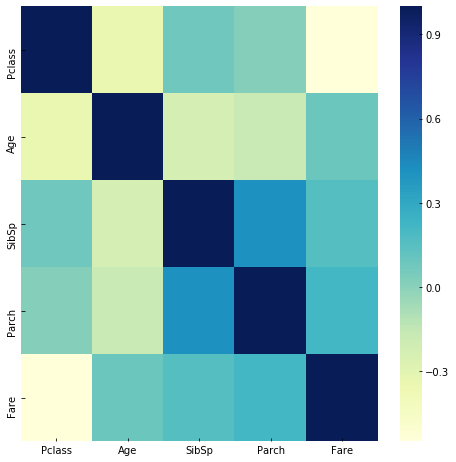

In [20]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(X.corr(),cmap="YlGnBu")

Logistic Regression is a natural starting point given that our dependent variable is categorical. We need to be wary of collinearity for logistic regression. This is because multicollinearity poses problems in getting precise estimates of the coefficients corresponding to particular variables. With a set of collinear variables all related to survival status, it's hard to know exactly how much credit each of them should get individually. Other classifiers like decision stumps don't have this problem. 
<br>
**Caveat:** If you don't care about how much credit to give to each feature, it is possible for them to work very well together for prediction. 
<br>
The heat map indicates the only potentially dangerous correlation is between SibSp (Siblings & Spouses) and Parch (Parents & Children). As we aren't concerned what the actual regression coefficients are, we are probably safe to proceed without removing either of these features (generally speaking accuracy will decrease if you remove predictor variables). The above collinearity was only mentioned for completeness.
<br>
As an aside, at first glance it was surprising to me that Fare and Pclass have a low negative correlation. Re-examining thetraining set, there does appear to be a wide range of prices paid for tickets of different classes and so it appears to make sense.

## Model 1: Logistic Regression

In [21]:
%%time
from sklearn import linear_model
lr_model = train_test_model(linear_model.LogisticRegression(random_state = 0), {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'class_weight': [None, 'balanced']}, X_train, X_valid, y_train, y_valid)

Optimized parameters: {'C': 0.1, 'class_weight': None}
Model accuracy (hold-out validation): 80.00%
Model accuracy (5-fold cross validation): 79.69%
CPU times: user 348 ms, sys: 392 ms, total: 740 ms
Wall time: 1.14 s


## Model 2: Decision Tree 

In [22]:
%%time
from sklearn.tree import DecisionTreeClassifier
# Use our function train_test_model with a variety of values for the hyperparameter C (inverse regularization strength) and class_weight (different weights can be given to different features).
dt_model = train_test_model(DecisionTreeClassifier(random_state = 0), {'min_samples_split': [2, 4, 8, 16], 'min_samples_leaf': [1, 3, 5, 10], 'max_depth': [2,3,4,5, None], 'class_weight': [None, 'balanced']}, X_train, X_valid, y_train, y_valid)

Optimized parameters: {'class_weight': None, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Model accuracy (hold-out validation): 83.33%
Model accuracy (5-fold cross validation): 82.39%
CPU times: user 628 ms, sys: 372 ms, total: 1 s
Wall time: 1.77 s


## Model 3: Random Forest

In [23]:
%%time
from sklearn.ensemble import RandomForestClassifier
# Use our function train_test_model with a variety of values for the hyperparameter C (inverse regularization strength) and class_weight (different weights can be given to different features).
rf_model = train_test_model(RandomForestClassifier(random_state = 0), {'min_samples_split': [2, 4, 8, 16], 'min_samples_leaf': [1, 3, 5, 10], 'max_depth': [3, None], 'class_weight': [None, 'balanced']}, X_train, X_valid, y_train, y_valid)

Optimized parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 8}
Model accuracy (hold-out validation): 83.33%
Model accuracy (5-fold cross validation): 81.71%
CPU times: user 480 ms, sys: 380 ms, total: 860 ms
Wall time: 2.63 s


## Model 4: Support Vector Machine (SVM)

In [24]:
%%time
from sklearn.svm import SVC
# Use our function train_test_model with a variety of values for the hyperparameter C (inverse regularization strength) and class_weight (different weights can be given to different features).
svc_model = train_test_model(SVC(random_state = 0), {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': np.logspace(-9, 3, 13), 'kernel': ['rbf','linear']}, X_train, X_valid, y_train, y_valid)

Optimized parameters: {'C': 1, 'gamma': 0.10000000000000001, 'kernel': 'rbf'}
Model accuracy (hold-out validation): 80.00%
Model accuracy (5-fold cross validation): 81.48%
CPU times: user 1.42 s, sys: 720 ms, total: 2.14 s
Wall time: 8min 50s


## Model 5: K-Nearest Neighbours (KNN)

In [25]:
%%time
from sklearn.neighbors import KNeighborsClassifier
# Use our function train_test_model with a variety of values for the hyperparameter C (inverse regularization strength) and class_weight (different weights can be given to different features).
knn_model = train_test_model(KNeighborsClassifier(), {'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21,23,25]}, X_train, X_valid, y_train, y_valid)

Optimized parameters: {'n_neighbors': 15}
Model accuracy (hold-out validation): 84.44%
Model accuracy (5-fold cross validation): 81.03%
CPU times: user 260 ms, sys: 404 ms, total: 664 ms
Wall time: 1.08 s


## Model 6: Neural Network (Keras)

In [26]:
%%time
import keras
# This is required to initialise our ANN
from keras.models import Sequential 
# This is required to build the layers of our ANN
from keras.layers import Dense 
# We initialise the ANN by building an object of the sequential class and then add layes below.
classifier = Sequential() 
# Add the hidden layers
classifier.add(Dense(input_dim = 10, activation = 'relu', units = 6, kernel_initializer = 'uniform')) 
classifier.add(Dense(activation = 'tanh', units = 6, kernel_initializer = 'uniform'))
classifier.add(Dense(activation = 'relu', units = 6, kernel_initializer = 'uniform'))
classifier.add(Dense(activation = 'tanh', units = 6, kernel_initializer = 'uniform'))
classifier.add(Dense(activation = 'sigmoid', units = 6, kernel_initializer = 'uniform'))
# Add the output layer
classifier.add(Dense(activation = 'sigmoid', units = 1, kernel_initializer = 'uniform'))
# Tell the ANN which loss function to use when applying stochastic gradient descent to find optimal weights
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fit classifier to training data
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)
# Make prediction on validation set
y_pred = classifier.predict(X_valid)
y_pred = (y_pred > 0.5) 

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid, y_pred)
correct = cm[0][0]+cm[1][1]
wrong = cm[1][0]+cm[0][1]
accuracy=(correct/(correct+wrong))*100
print("Model accuracy: {:.2f}".format(accuracy))

Using TensorFlow backend.


Epoch 1/100
801/801 [==============================] - 0s 513us/step - loss: 0.6882 - acc: 0.5568
Epoch 2/100
801/801 [==============================] - 0s 213us/step - loss: 0.6728 - acc: 0.6217
Epoch 3/100
801/801 [==============================] - 0s 212us/step - loss: 0.6602 - acc: 0.6217
Epoch 4/100
801/801 [==============================] - 0s 211us/step - loss: 0.6174 - acc: 0.6217
Epoch 5/100
801/801 [==============================] - 0s 211us/step - loss: 0.5823 - acc: 0.6217
Epoch 6/100
801/801 [==============================] - 0s 215us/step - loss: 0.5657 - acc: 0.6217
Epoch 7/100
801/801 [==============================] - 0s 219us/step - loss: 0.5539 - acc: 0.6217
Epoch 8/100
801/801 [==============================] - 0s 212us/step - loss: 0.5427 - acc: 0.6217
Epoch 9/100
801/801 [==============================] - 0s 213us/step - loss: 0.5333 - acc: 0.6916
Epoch 10/100
801/801 [==============================] - 0s 211us/step - loss: 0.5291 - acc: 0.8077
Epoch 11/100
801/80

**Important:** The above neural network has somewhat confusing output. Throughout the majority of the training epochs, it claims to have an accuracy between $%83\%$ and $85\%$ which would put it in contention for our best model. Yet, when we calculate the Model accuracy directly at the end we get a dissapointing result of $\sim 78\$.
This is because the score method used in keras does not calculate accuracy like the sklearn's accuracy_score method. The actual classification accuracy we are interested in will be the Model accuracy coming from the confusion matrix calculation.
<br>
This is probably to be expected since our data is linearly separable and so strictly speaking we shouldn't need any any hidden layers at all. Indeed, the evidence above seems to support the fact that for this dataset we don't need an neural entwork to resolve our data (although it will still do the job). 

# Part 4: Submission
The Support Vector Classifier (SVC) model works best on test set so select it and run it.

In [27]:
test_hot.shape

(418, 10)

In [67]:
# Call svc_model which loads the Support Vectorree Classifier (with optimal hyperparameters) and use it to make predictions on the test set.
best_model = svc_model
test_pred = best_model.predict(test_hot)

'''The following code is only necessary if working with Classifier 6 (the neural network). 
Specifically, it takes the test_pred output and sets it to the correct format and dimensionality for Kaggle submission.'''
#for i in range(len(test_pred)):
#    if test_pred[i] < 0.5:
#        test_pred[i] = int(0)
#    else:
#        test_pred[i] = int(1)
#test_pred = test_pred.astype(np.int64)
#test_pred = test_pred.T
#test_pred = test_pred.reshape(1,418)
#test_pred = test_pred[0]
print(test_pred)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [68]:
submission = pd.DataFrame({
        "PassengerId": test_data_PassengerId["PassengerId"],
        "Survived": test_pred
    })
submission.to_csv('titanic.csv', index=False)

In [30]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


# Part 4: Predicting on Movie Characters
I created my own dataset with five characters. These include:
* Jack (age sourced from actor's age in 1997 and fare = $\$0$ since he won the ticket)
* Rose (age sourced from Wikipedie article on Titanic movie and fare calculate as being 2 standard deviations above the mean of all other 1st class passengers i.e. $94.280297 + 2 \times 84.435858 \simeq \$263.15$)
* Calvin (age sourced from actor's age in 1997 and fare calculated in same way as for Rose)
* Because all three of the above characters boarded in Southampton, my one hot encoding only needed 8 rows to create all necessary dummy variables. This meant it wasn't the right size to be fed into the classification models trained above. Consequently, I have added two additional characters, "Jimbo" and "Jimbo Two", with random values for all categories except embarked where I made sure to give one of them a "Q" and one of them a "C" so that the one hot encoded movie data would take up 10 columns and be compatible with our classifiers above. We do not care about the fate of Jimbo or Jimbo Two in our summary below....

In [31]:
# Explore the movie dataset
movie_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,Jack,male,23,0,0,330911.0,0.00,NaN,S
1,2,1,Rose,female,17,0,1,363272.0,263.15,NaN,S
2,3,1,Calvin,male,31,0,0,240276.0,263.15,NaN,S
3,4,3,Jimbo,male,20,4,2,NaN,100.00,NaN,Q
4,5,2,JimboTwo,male,20,3,3,NaN,55.00,NaN,C


In [32]:
movie_data = movie_data.drop(["PassengerId", "Cabin", "Ticket"], axis = 1)
movie_hot = pd.get_dummies(movie_data, prefix=['Sex', 'Embarked'], columns=['Sex', 'Embarked'])
movie_hot = movie_hot.drop('Name',axis=1)
movie_hot = sc_X.fit_transform(movie_hot)
movie_hot

array([[ 1.11803399,  0.16695677, -0.80295507, -1.02899151, -1.25771655,
        -0.5       ,  0.5       , -0.5       , -0.5       ,  0.81649658],
       [-1.11803399, -1.08521903, -0.80295507, -0.17149859,  1.17122892,
         2.        , -2.        , -0.5       , -0.5       ,  0.81649658],
       [-1.11803399,  1.83652452, -0.80295507, -1.02899151,  1.17122892,
        -0.5       ,  0.5       , -0.5       , -0.5       ,  0.81649658],
       [ 1.11803399, -0.45913113,  1.49120227,  0.68599434, -0.33468958,
        -0.5       ,  0.5       , -0.5       ,  2.        , -1.22474487],
       [ 0.        , -0.45913113,  0.91766294,  1.54348727, -0.75005172,
        -0.5       ,  0.5       ,  2.        , -0.5       , -1.22474487]])

In [33]:
movie_hot.shape

(5, 10)

In [34]:
best_model = dt_model
movie_pred = best_model.predict(movie_hot)
Names = ['Jack','Rose','Calvin']
Dead = ['die', 'survive to tell the tale to Paramount Pictures']
for i in range(3):
    print("{} will {}".format(Names[i], Dead[movie_pred[i]]))

Jack will die
Rose will survive to tell the tale to Paramount Pictures
Calvin will die


# Part 5: Conclusion
Thanks for reading. I'm new to Kaggle so welcome any feedback.